### Student Information
Name:楊朝凱

Student ID:110062621

GitHub ID:KyleYang0503

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [108]:
### Begin Assignment Here
import pandas as pd
imdb = pd.read_csv('./imdb_labelled.txt',sep='\t',names=['sentence','score'], header=None)
amazon = pd.read_csv('./amazon_cells_labelled.txt',sep='\t',names=['sentence','score'], header=None)
yelp = pd.read_csv('./yelp_labelled.txt',sep='\t',names=['sentence','score'], header=None)

X = pd.concat([imdb,amazon, yelp], ignore_index=True, axis=0)


### Data Mining using Pandas
###             1.Missing Values

In [109]:
X['score']

0       0
1       0
2       0
3       0
4       1
       ..
2743    0
2744    0
2745    0
2746    0
2747    0
Name: score, Length: 2748, dtype: int64

In [110]:
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


###  2.Duplicate 

In [111]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [112]:
sum(X.duplicated())

17

In [113]:
X.drop_duplicates(keep=False, inplace=True)

In [114]:
sum(X.duplicated('sentence'))


0

In [115]:
len(X)


2714

### Preprocessing

### 1.Sampling

In [116]:
X_sample = X.sample(n=1000) #random state
import matplotlib.pyplot as plt
%matplotlib inline


<AxesSubplot:title={'center':'score distribution'}>

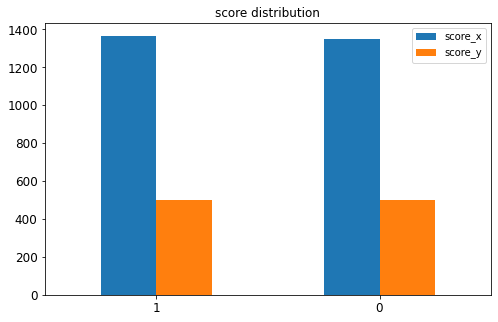

In [117]:
import seaborn as sns

score = pd.DataFrame(X.score.value_counts())
sample = pd.DataFrame(X_sample.score.value_counts())

ans = score.merge(sample, left_index = True, right_index = True)
ans.rename(columns = {'data': 'x', 'data': 'x_sample'}, inplace=True)

ans.plot(kind = 'bar',
               title = 'score distribution',
               rot = 0, fontsize = 12, figsize = (8,5))

### 2.Feature Creation

In [118]:
import nltk
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

#preprocessing for TF-IDF

def preprocessing(text):
    text = text.lower() 
    text = text.translate(str.maketrans('', '', string.punctuation)) #remove punctuation

    return [stemmer.stem(w) for w in re.split('\s+', text.strip()) \
            if w not in stop and re.match('[a-zA-Z]+', w)]

import nltk
import math
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer

def get_tokens(text):
    
    #set all of string to lower ,otherwise Uppercase and lowercase will be different
    lowers = text.lower() 
    #remove punctuation because it isn't used
    remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
    no_punctuation = lowers.translate(remove_punctuation_map) 
    tokens = nltk.word_tokenize(no_punctuation)
    text = text.strip()

    return tokens


def stem_tokens(text):
    text = get_tokens(text)
    
    #Ex. remove stopword like a,the,and
    filtered = [w for w in text if not w in stopwords.words('english')]
    
    #Ex. Filterd Similar words Films, film, filmed can actually be seen as film
    stemmed = []
    stemmer = PorterStemmer()
    for item in filtered:
        stemmed.append(stemmer.stem(item))
    return stemmed



In [119]:
X['tokens'] = X['sentence'].apply(lambda x: stem_tokens(x))
X['tokens']

0       [slowmov, aimless, movi, distress, drift, youn...
1       [sure, lost, flat, charact, audienc, nearli, h...
2       [attempt, arti, black, white, clever, camera, ...
3                            [littl, music, anyth, speak]
4       [best, scene, movi, gerardo, tri, find, song, ...
                              ...                        
2743                  [think, food, flavor, textur, lack]
2744                           [appetit, instantli, gone]
2745                   [overal, impress, would, go, back]
2746    [whole, experi, underwhelm, think, well, go, n...
2747    [hadnt, wast, enough, life, pour, salt, wound,...
Name: tokens, Length: 2714, dtype: object

In [120]:
X['tokens'] = X['tokens'].apply(lambda x: ' '.join(x))
count = Counter(X['tokens'] )


In [121]:
print(count)

Counter({'disappoint': 11, 'work': 4, 'avoid cost': 3, 'dont wast money': 3, 'wast money': 3, 'back': 3, 'cool': 2, 'bore': 2, 'horribl': 2, 'aw': 2, 'like': 2, 'good': 2, 'wont regret': 2, 'highli recommend': 2, 'dont wast time': 2, 'work great': 2, 'send back': 2, 'would recommend': 2, 'dont buy': 2, 'good price': 2, 'happi': 2, 'love phone': 2, 'work well': 2, 'great product price': 2, 'happi product': 2, 'would recommend other': 2, 'easi use': 2, 'great product': 2, 'great phone': 2, 'want': 2, 'excel': 2, 'delici': 2, 'wont go back': 2, 'food good': 2, 'mistak': 2, 'awesom': 2, 'slowmov aimless movi distress drift young man': 1, 'sure lost flat charact audienc nearli half walk': 1, 'attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost nonexist': 1, 'littl music anyth speak': 1, 'best scene movi gerardo tri find song keep run head': 1, 'rest movi lack art charm mean empti work guess empti': 1, 'wast two hour': 1, 'saw movi today t

### TF-IDF Visualization

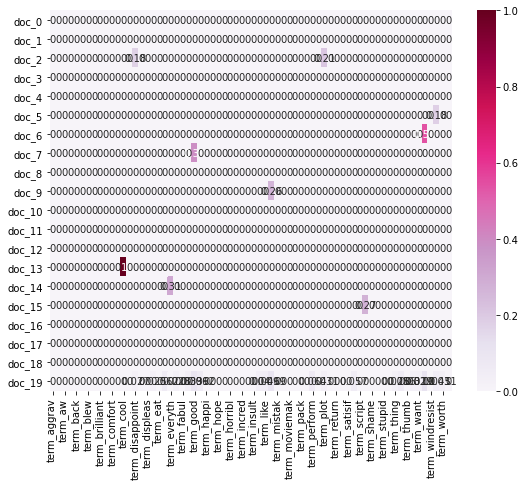

In [122]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
tfidf_vectorize = TfidfVectorizer()
X_tfidf = tfidf_vectorize.fit_transform(X.tokens)
c_vect = CountVectorizer()
X_counts = c_vect.fit_transform(X.tokens)
tfidf_vectorize.get_feature_names()[0:10]

df_todraw = pd.DataFrame(X_tfidf.toarray(), columns = tfidf_vectorize.get_feature_names())

# 1 is threshod of item to draw lower than 1 will get to many item to visualization
keep = df_todraw.max()>=1 

df_todraw = df_todraw[df_todraw.columns[keep.values==True]]
df_todraw = df_todraw[:20]

for term in df_todraw.columns:
    
    df_todraw.rename({term : f'term_{term[:10]}'}, axis=1, inplace=True)
for i in range(20):
    df_todraw.rename({i : f'doc_{i}'}, axis=0, inplace=True)
    
df_todraw
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


### 3.Feature subset selection

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)

In [124]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")


['hello', 'world']

### 4.Dimensionality Reduction

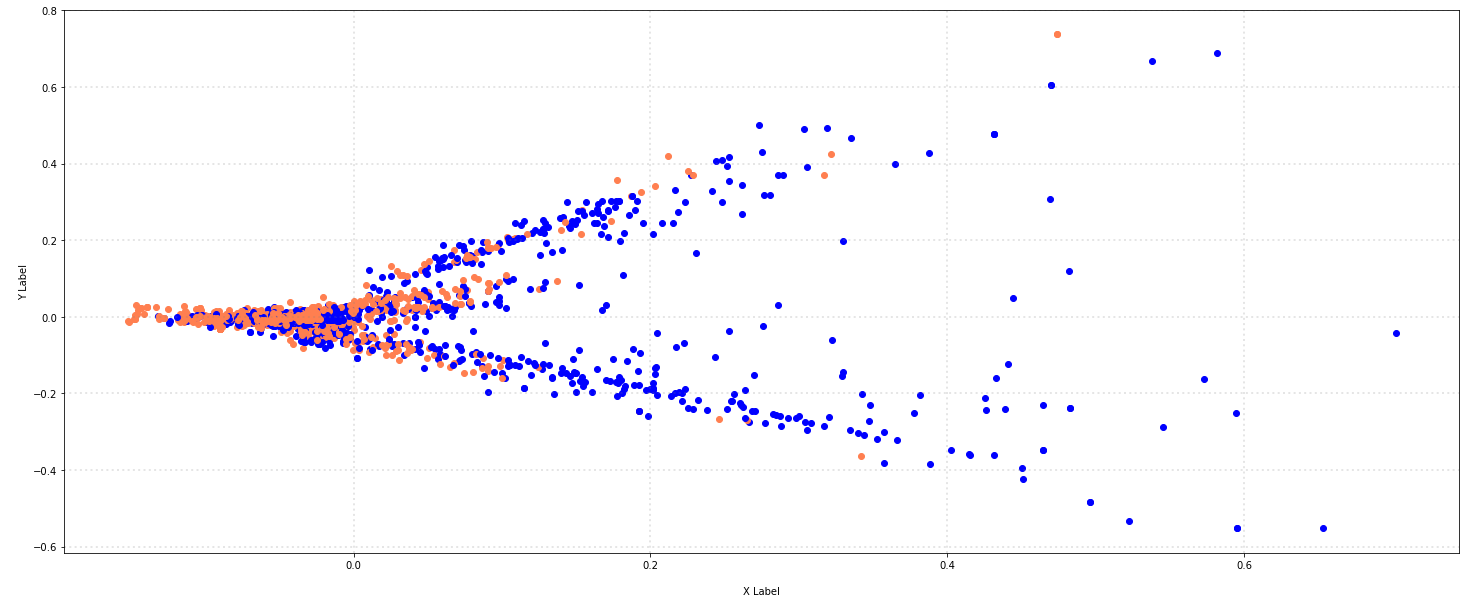

In [125]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_tfidf.toarray())
col = {0:'coral', 1: 'blue'}

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

    
for index, instance in enumerate(X_reduced):
    xs,ys = X_reduced[index]
    color = col[X['score'].values[index]]
    ax.scatter(xs, ys,c=color)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
    
plt.show()


In [126]:
X_reduced = PCA(n_components = 3).fit_transform(X_tfidf.toarray())
X_reduced.shape


(2714, 3)

In [127]:
X_reduced

array([[-0.04507673, -0.00302853,  0.0005919 ],
       [-0.03491445, -0.00719206,  0.00628824],
       [-0.06441107, -0.00620637, -0.03502706],
       ...,
       [-0.10800391, -0.01324773, -0.06256194],
       [-0.06493953, -0.00573883, -0.00420109],
       [-0.05474225,  0.00952961, -0.01232741]])

In [128]:
X['score']

0       0
1       0
2       0
3       0
4       1
       ..
2743    0
2744    0
2745    0
2746    0
2747    0
Name: score, Length: 2714, dtype: int64

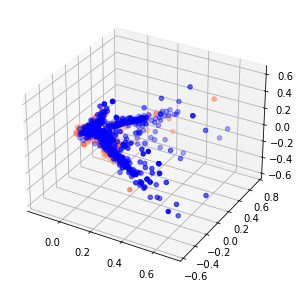

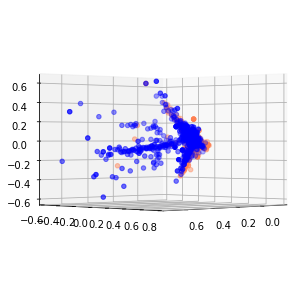

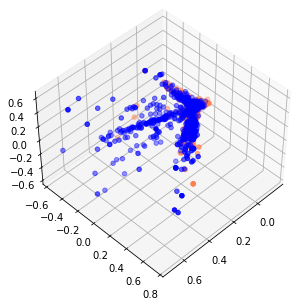

In [129]:
col = ['coral', 'blue']
categories = {1,0}
for elev, azim in  [(30, -60), (0, 45), (45, 45)]:
    
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection='3d')

    for c, category in zip(col, categories):
        xs = X_reduced[X['score'] == category].T[0]
        ys = X_reduced[X['score'] == category].T[1]
        zs = X_reduced[X['score'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o')
    
    ax.view_init(elev=elev, azim=azim)
    plt.show()



### 5.Atrribute Transformation / Aggregation

In [130]:
import numpy as np
tfidf = np.asarray(X_tfidf.sum(axis=0))[0]
tfidf.shape

(4157,)

[Text(0, 0, 'aailiyah'),
 Text(1, 0, 'abandon'),
 Text(2, 0, 'abhor'),
 Text(3, 0, 'abil'),
 Text(4, 0, 'abl'),
 Text(5, 0, 'abound'),
 Text(6, 0, 'abovepretti'),
 Text(7, 0, 'abroad'),
 Text(8, 0, 'absolut'),
 Text(9, 0, 'absolutel'),
 Text(10, 0, 'absolutley'),
 Text(11, 0, 'abstrus'),
 Text(12, 0, 'abysm'),
 Text(13, 0, 'ac'),
 Text(14, 0, 'academi'),
 Text(15, 0, 'accent'),
 Text(16, 0, 'accept'),
 Text(17, 0, 'access'),
 Text(18, 0, 'accessori'),
 Text(19, 0, 'accessoryon'),
 Text(20, 0, 'accid'),
 Text(21, 0, 'accident'),
 Text(22, 0, 'acclaim'),
 Text(23, 0, 'accolad'),
 Text(24, 0, 'accommod'),
 Text(25, 0, 'accomod'),
 Text(26, 0, 'accompani'),
 Text(27, 0, 'accord'),
 Text(28, 0, 'accordingli'),
 Text(29, 0, 'account'),
 Text(30, 0, 'accur'),
 Text(31, 0, 'accus'),
 Text(32, 0, 'ach'),
 Text(33, 0, 'achiev'),
 Text(34, 0, 'achil'),
 Text(35, 0, 'ackerman'),
 Text(36, 0, 'acknowledg'),
 Text(37, 0, 'across'),
 Text(38, 0, 'act'),
 Text(39, 0, 'actingeven'),
 Text(40, 0, 'actin

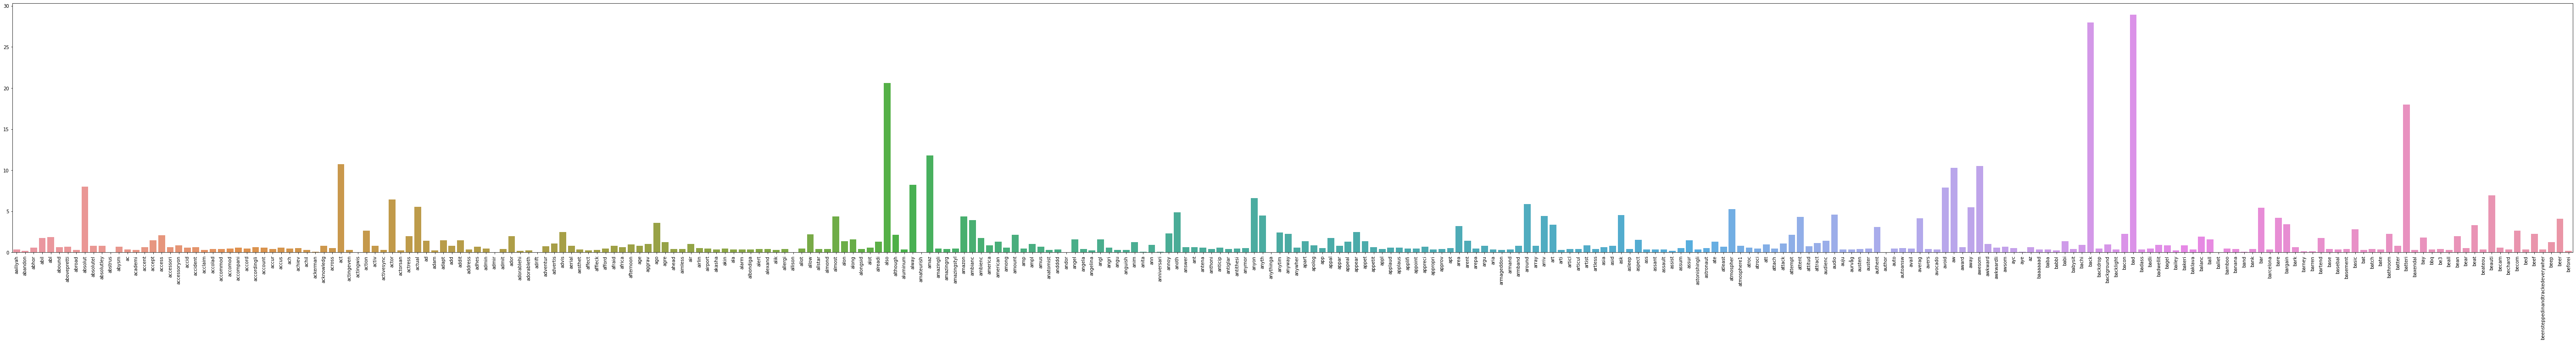

In [131]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=tfidf_vectorize.get_feature_names()[74:374], #[74:374] is because [0:73] is not items I want
            y=tfidf[74:374])
g.set_xticklabels(tfidf_vectorize.get_feature_names()[74:374], rotation = 90)


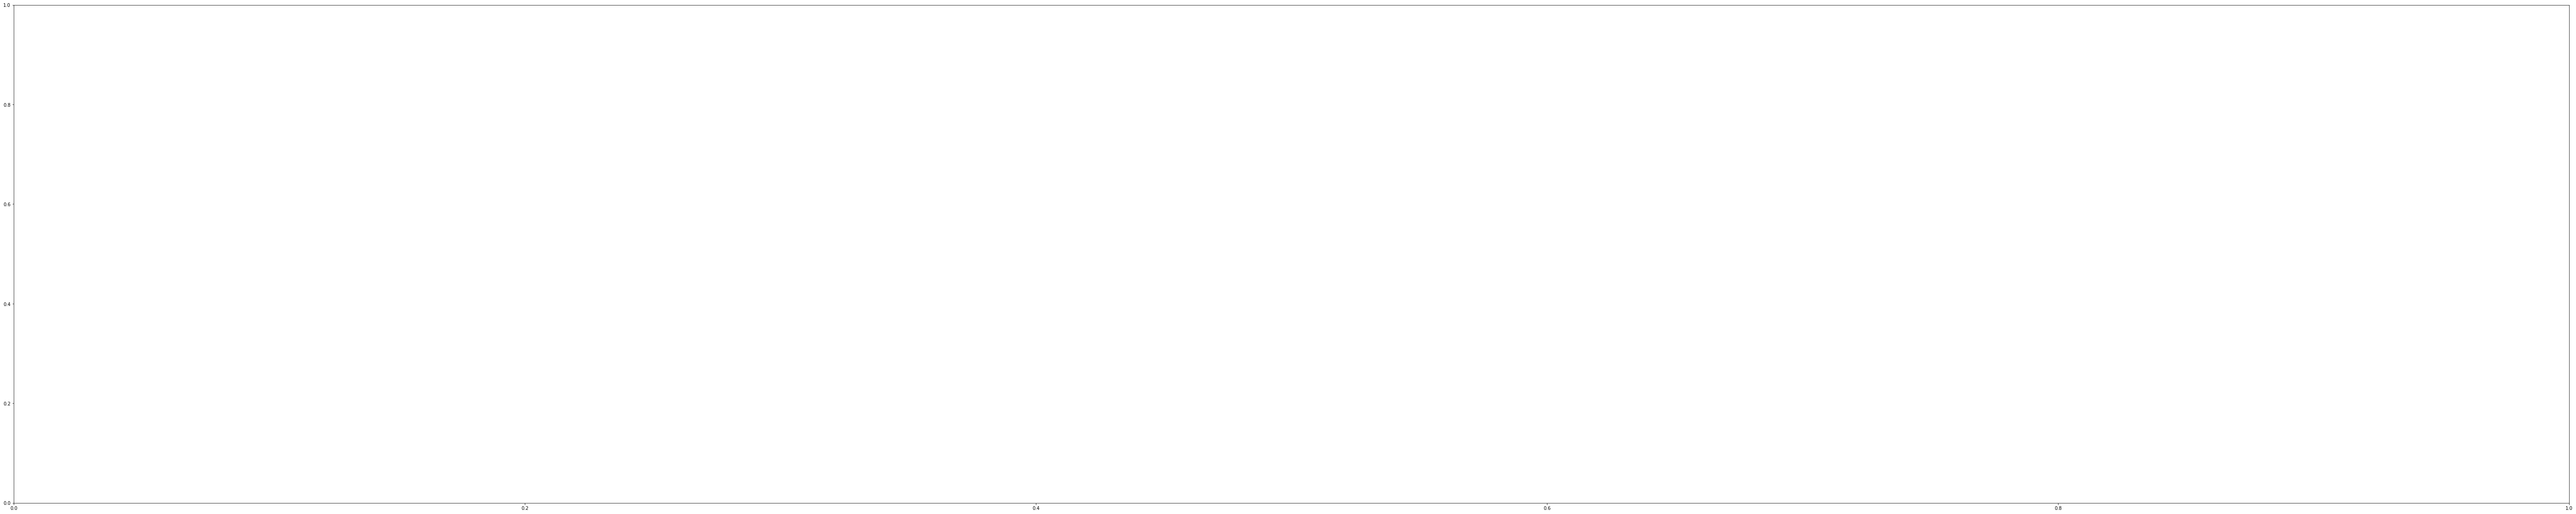

In [132]:
import plotly.express
plt.subplots(figsize=(100, 20))
df = pd.DataFrame({"term":tfidf_vectorize.get_feature_names()[:100], "tfidf": tfidf[:100]})
df.sort_values('tfidf', ascending=False, inplace=True)
fig = plotly.express.bar(df, x='term', y='tfidf')
fig.show()


In [133]:
terms = np.array(tfidf_vectorize.get_feature_names())
terms = terms[tfidf>0.5]
tfidf_ = tfidf[tfidf>0.5]
df = pd.DataFrame({"term":terms, "tfidf": tfidf_})
df.sort_values('tfidf', ascending=False, inplace=True)
fig = px.bar(df, x='term', y='tfidf')
fig.show()


### 6. Data Exploration

In [134]:
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['tokens']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['tokens']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['tokens']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)


['movi bore sometim found occupi peak paper instead watch never happen columbo movi']
['dont think ive ever gone movi dislik much']
['everyth movi stupid']


In [135]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())


Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [136]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})


Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


### New Data Visualizations

    We can apply DBSCAN on data after PCA execution
    DBSCAN is the way to cluster.DBSCAN is kind of Density-Based method.
    what this method pays most attention to is the density of data.
    


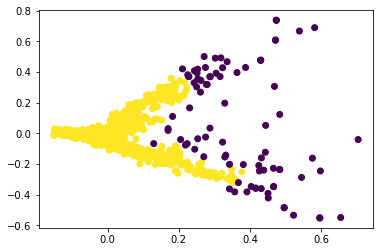

In [194]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

col = {0: 'coral', 1: 'blue', }

reduced_data = PCA(n_components=2).fit_transform(X_tfidf.toarray())

clustering=DBSCAN(eps=0.04,min_samples=10).fit(reduced_data) 
#eps mean radius of the circle
# min_samples represents the minimum number of samples desired in the circle centered on the core point

labels = clustering.labels_ #DBSCAN result

fig, ax = plt.subplots()
    
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=labels)


### Naive Bayes classifier

In [149]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score as cvs


model = MultinomialNB()
#TF-IDF features
temp = cvs(estimator=model, X=X_tfidf,y=X['score'], cv=10, scoring='accuracy')
#Word frequency
temp2 = cross_val_score(estimator=model, X=X_counts, y=X['score'],cv=10, scoring='accuracy')

print('TF-IDF =',temp.mean())
print('Word frequency =',temp2.mean())

TF-IDF = 0.8002984588669417
Word frequency = 0.8069473084436727
